In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/senators analysis/namayandeh.xlsx'
df1 = pd.read_excel(file_path)

In [4]:
df1

,id,name,link_ax,tavalod,mahal_tavalod,tasalot_bar_zaban,savagegh_tahsilat,doreha,sal_semat,ozviat_comision,howzeh,tarh_emza_shedeh,link_tarh_emza_shodeh,tarikh_tarh,ham_howzeh
0,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
1,https://rc.majlis.ir/fa/parliament_member/show...,الهام آزاد,https://rc.majlis.ir/rc-assets/pm/0baba57d0df3...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون اصل نودم قانون اساسی مجلس , کمیسیون ا...",اصفهان (نائین),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/10/22,1400/08/26,1400/08/26,14...","الهام آزاد,ابوالفضل ابوترابی,امیرحسین بانکی ..."
2,https://rc.majlis.ir/fa/parliament_member/show...,یحیی ابراهیمی,https://rc.majlis.ir/rc-assets/pm/8ec8f524f033...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون بهداشت و درمان , کمیسیون بهداشت و درمان",لرستان (دلفان / سلسله),طرح الحاق ماده ( ۸۴ مکرر) به قانون آیین دادرسی...,https://rc.majlis.ir/fa/legal_draft/show/17427...,"1400/10/08,1400/08/23,1400/11/09,1399/11/19,14...","یحیی ابراهیمی,محمدرضا مبلغی,مرتضی محمودوند,..."
3,https://rc.majlis.ir/fa/parliament_member/show...,مصطفی آقامیرسلیم,https://rc.majlis.ir/rc-assets/pm/4be90752198f...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون تدوین آیین‌نامه داخلی مجلس , کمیسیون ...",تهران (اسلامشهر / تهران / ری / شمیرانات),الحاق دو بند به قانون فهرست نهادها و موسسات ع...,https://rc.majlis.ir/fa/legal_draft/show/17427...,"1399/10/16,1400/03/09,1400/09/17,1400/09/16,14...","مصطفی آقامیرسلیم,مجتبی توانگر,سید محسن دهنو..."
4,https://rc.majlis.ir/fa/parliament_member/show...,اکبر احمدپور,https://rc.majlis.ir/rc-assets/pm/7abd9d10a651...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون آموزش و تحقیقات, کمیسیون آموزش و تحقی...",خراسان رضوی (خواف / رشتخوار),طرح الحاق یک تبصره به ماده ( ۶) قانون حمایت از...,https://rc.majlis.ir/fa/legal_draft/show/16805...,"1399/11/19,1400/08/26,1400/08/26,1399/09/26,13...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,https://rc.majlis.ir/fa/parliament_member/show...,موسی غضنفرآبادی,https://rc.majlis.ir/rc-assets/pm/1437531419.U...,1345.0,بم,\n ...,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون قضایی و حقوقی , کمیسیون تدوین آیین‌نا...",کرمان (بم),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/11/09,1400/09/14,1400/09/22,14...","صمد اله محمدی,ذبیح اله اعظمی ساردویی,حسین ج..."
4028,https://rc.majlis.ir/fa/parliament_member/show...,مهدی عیسی زاده,https://rc.majlis.ir/rc-assets/pm/1042635935.U...,1341.0,احمدعلی,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون اجتماعی , کمیسیون اجتماعی , کمیسیون ت...",آذربایجان غربی (میاندوآب),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/07/23,1400/08/26,1399/09/23,13...","یعقوب رضازاده,وحید جلال زاده,انور حبیب زاده ..."
4029,https://rc.majlis.ir/fa/parliament_member/show...,رسول فرخی میکال,https://rc.majlis.ir/rc-assets/pm/1688689121.f...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون امور داخلی کشور و شوراها, کمیسیون امو...",گیلان (لاهیجان),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1399/10/16,1400/11/09,1400/03/09,13...","احمد دنیامالی,غلامرضا مرحبا,مهرداد گودرزوند..."
4030,https://rc.majlis.ir/fa/parliament_member/show...,ابوالفضل عمویی,https://rc.majlis.ir/rc-assets/pm/c99de5587e89.

In [ ]:
df1.isnull

In [27]:
df=df1[['name', 'ham_howzeh']]
df

,name,ham_howzeh
0,علی آذری,"علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
1,الهام آزاد,"الهام آزاد,ابوالفضل ابوترابی,امیرحسین بانکی ..."
2,یحیی ابراهیمی,"یحیی ابراهیمی,محمدرضا مبلغی,مرتضی محمودوند,..."
3,مصطفی آقامیرسلیم,"مصطفی آقامیرسلیم,مجتبی توانگر,سید محسن دهنو..."
4,اکبر احمدپور,"علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
...,...,...
4027,موسی غضنفرآبادی,"صمد اله محمدی,ذبیح اله اعظمی ساردویی,حسین ج..."
4028,مهدی عیسی زاده,"یعقوب رضازاده,وحید جلال زاده,انور حبیب زاده ..."
4029,رسول فرخی میکال,"احمد دنیامالی,غلامرضا مرحبا,مهرداد گودرزوند..."
4030,ابوالفضل عمویی,"مصطفی آقامیرسلیم,مجتبی توانگر,سید محسن دهنو..."


In [28]:
df=df.dropna().reset_index()
df

,index,name,ham_howzeh
0,0,علی آذری,"علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
1,1,الهام آزاد,"الهام آزاد,ابوالفضل ابوترابی,امیرحسین بانکی ..."
2,2,یحیی ابراهیمی,"یحیی ابراهیمی,محمدرضا مبلغی,مرتضی محمودوند,..."
3,3,مصطفی آقامیرسلیم,"مصطفی آقامیرسلیم,مجتبی توانگر,سید محسن دهنو..."
4,4,اکبر احمدپور,"علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
...,...,...,...
622,4027,موسی غضنفرآبادی,"صمد اله محمدی,ذبیح اله اعظمی ساردویی,حسین ج..."
623,4028,مهدی عیسی زاده,"یعقوب رضازاده,وحید جلال زاده,انور حبیب زاده ..."
624,4029,رسول فرخی میکال,"احمد دنیامالی,غلامرضا مرحبا,مهرداد گودرزوند..."
625,4030,ابوالفضل عمویی,"مصطفی آقامیرسلیم,مجتبی توانگر,سید محسن دهنو..."


In [71]:
G3=nx.Graph()

In [72]:
df.iloc[1 ,1:]

name                                                الهام  آزاد
ham_howzeh    الهام  آزاد,ابوالفضل ابوترابی,امیرحسین  بانکی ...
Name: 1, dtype: object

In [73]:
senators=tuple(df['name'])
senators

('علی  آذری',
 'الهام  آزاد',
 'یحیی  ابراهیمی',
 'مصطفی  آقامیرسلیم',
 'اکبر  احمدپور',
 'احد  آزادی خواه',
 'رضا  آریان پور',
 'احسان  ارکانی',
 'امیرحسین  بانکی پورفرد',
 'علی اکبر  بسطامی',
 'صدیف بدری',
 'حسین  بامیری',
 'محمد باقری بنابی',
 'عبداله  ایزدپناه',
 'محمود احمدی بیغش',
 'مهدی باقری',
 'عزت اله اکبری تالارپشتی',
 'مصطفی  نخعی',
 'فرهاد بشیری',
 'سید محسن  دهنوی',
 'صمد اله  محمدی',
 'روح اله  ایزدخواه',
 'محمدعلی  محسنی بند پی',
 'سید مجتبی  محفوظی',
 'فاطمه  محمدبیگی',
 'محمدرضا  مبلغی',
 'روح الله  متفکر آزاد',
 'حسن  لطفی',
 'بهروز  محبی نجم آبادی',
 'زهره سادات  لاجوردی',
 'سارا  فلاحی',
 'احمدحسین  فلاحی',
 'محسن  زنگنه',
 'مهدی  روشنفکر',
 'مجتبی  رضاخواه',
 'عبدالحسین  روح الامینی',
 'فاطمه  رحمانی',
 'عبدالعلی  رحیمی مظفری',
 'حسین  رئیسی',
 'یعقوب  رضازاده',
 'محمد مهدی  فروردین',
 'ولی اله  فرزانه',
 'محسن  فتحی',
 'فریدون  عباسی دوانی',
 'احمد   علیرضا بیگی',
 'امانقلیچ  شادمهر',
 'محمد  سرگزی',
 'کیومرث  سرمدی واله',
 'مجتبی  یوسفی',
 'منصور آرامی',
 'بهزاد

In [74]:
#####
ham_howzeiha=set()
for ham_howzeh in df['ham_howzeh']:
  ham=str(ham_howzeh).split(',')
  ham_howzeiha.update(ham)

len(ham_howzeiha)


756

In [75]:
G3.add_nodes_from(senators)
G3.add_nodes_from(ham_howzeiha)


In [76]:
print(G3)

Graph with 756 nodes and 0 edges


In [77]:

for _, row in df.iterrows():
        representatives = row['name']
        ham_howzeiha=str(row['ham_howzeh']).split(',')

        for ham_howzeh in ham_howzeiha:
              G3.add_edge(representatives, ham_howzeh)

In [78]:
len(ham_howzeiha)

18

In [94]:
print(G3)

Graph with 756 nodes and 4781 edges


In [ ]:
for edge in G3.edges:
  print(edge)

In [81]:
print(G3)

Graph with 756 nodes and 4781 edges


In [95]:
pos=nx.spring_layout(G3)

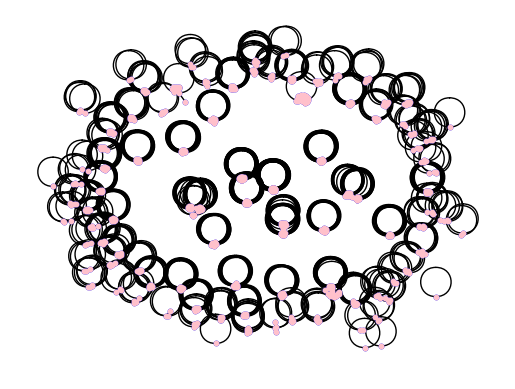

In [84]:
nx.draw_networkx_nodes(G3 , pos, node_color='blue', node_size=10 )
nx.draw_networkx_nodes(G3 , pos, node_color='pink' , node_size=10)

nx.draw_networkx_edges(G3 , pos)

#label_pos = {k:(v[0], v[1]+0.05) for k,v in pos.items()}
#nx.draw_networkx_labels(G2, label_pos, font_size=5, font_weight='bold', font_color='k')

plt.axis('off')
plt.show()

In [96]:
nx.write_graphml(G3,'HAM_HOWZE.graphml')

In [86]:
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(G3))
num_communities = len(communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(communities):
    print(f"Community {i + 1}: {list(community_nodes)}")


Number of Communities: 94
Community 1: ['ابوالفضل سروش', 'پروانه سلحشوری', 'قاسم میرزایی نیکو', 'سهیلا جلودارزاده', 'محمدعلی وکیلی', 'محمد جواد  فتحی', 'مصطفی کواکبیان', 'محمدرضا بادامچی', 'کارن خانلری', 'عبدالرضا  هاشم زایی', 'محمدرضا نجفی', 'پروانه مافی', 'بهروز نعمتی', 'علی مطهری', 'فریده اولاد قباد', 'سیده فاطمه حسینی', 'احمد  مازنی', 'فاطمه سعیدی', 'الیاس حضرتی', 'سیده فاطمه ذوالقدر', 'محسن  علی جانی زمانی', 'سیامک مره صدق', 'علیرضا محجوب', 'سید فرید موسوی', 'محمود صادقی', 'غلامرضا حیدری', 'مهدی شیخ', 'کاظم جلالی', 'داود  محمدی', 'طیبه سیاوشی شاه عنایتی', 'محمد قمی', 'محمد محمودی شاه نشین', 'علی نوبخت حقیقی', 'علیرضا رحیمی', 'محمدرضا عارف', 'سیدحسین نقوی حسینی']
Community 2: [' سید نظام الدین  موسوی', 'سیدمحمود نبویان', 'روح اله  ایزدخواه', 'حسن نوروزی', 'بیژن نوباوه وطن', 'فاطمه رهبر', 'علی  خضریان', 'احمد  نادری', 'محمدباقر  قالیباف', 'مهدی  شریفیان', 'ابوالفضل  عمویی', 'زهره سادات  لاجوردی', 'رضا تقی پور انوری', 'حسین نوش آبادی', 'سید احسان  خاندوزی', 'الیاس نادران', 'سمیه  رفی

In [87]:
from networkx.algorithms.community.louvain import modularity
greedy_modularity=modularity(G3 ,communities )
greedy_modularity

0.944827668574638

In [88]:
from networkx.algorithms import community

gn_communities = list(community.girvan_newman(G3))
num_communities = len(gn_communities)
print("Number of Communities:", num_communities)

KeyboardInterrupt: ignored

In [89]:
from networkx.algorithms import community

louvain_communities = list(community.louvain_communities(G3))
num_communities = len(louvain_communities)
print("Number of Communities:", num_communities)

Number of Communities: 94


In [90]:
for i, community_nodes in enumerate(louvain_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Community 1: ['علی اصغر  عنابستانی', 'احسان  ارکانی', 'حسین  عباس زاده', 'سیدامیرحسین قاضی زاده هاشمی', 'علی  آذری', 'محمد  صفایی دلوئی', 'محمدحسین حسین زاده بحرینی', 'حسن رزمیان مقدم', 'جواد کریمی قدوسی', 'بهروز  محبی نجم آبادی', 'سید احسان قاضی زاده هاشمی', 'جواد  نیک بین', 'جلیل  رحیمی جهان آبادی', 'هاجر چنارانی', 'محسن  زنگنه', 'نصراله پژمان فر', 'اکبر  احمدپور', 'فاطمه  رحمانی']
Community 2: ['بهزاد علیزاده', 'سارا  فلاحی', 'علی اکبر  بسطامی']
Community 3: ['احمد  راستینه هفشجانی', 'حسین  بامیری', 'قدرت اله  حمزه شلمزاری', 'امیرقلی  جعفری بروجنی']
Community 4: ['محمدحسن آصفری', 'محمد  سبزی', 'علیرضا سلیمی', 'محمود احمدی بیغش', 'علیرضا  نظری', 'علی اکبر  کریمی']
Community 5: ['سید مرتضی  خاتمی', 'مهدی باقری', 'سید البرز  حسینی', 'حسن  شجاعی علی آبادی', 'مصطفی  طاهری']
Community 6: ['سلمان  اسحاقی', 'مصطفی  نخعی', 'حسین  خسروی اسفزار', 'مجید  نصیرایی']
Community 7: ['ولی اله  فرزانه', 'محمدعلی  محسنی بند پی', 'علی اصغر  باقرزاده', 'غلامرضا  شریعتی اندراتی', 'کیوان  مرادیان کوچکسرایی

In [91]:
from networkx.algorithms.community.louvain import modularity
louvain_modularity=modularity(G3 ,louvain_communities )
louvain_modularity

0.9448276685746378

In [ ]:
lp_communities = list(community.label_propagation_communities(G3))

num_communities = len(lp_communities)
print("Number of Communities (Label Propagation):", num_communities)

for i, community_nodes in enumerate(lp_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

In [93]:
from networkx.algorithms.community.louvain import modularity
louvain_modularity=modularity(G3 ,lp_communities )
louvain_modularity

0.682558081186678